<a href="https://colab.research.google.com/github/Sudipta-Mitra/binary_classification_model/blob/main/binary_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score, recall_score, f1_score

In [ ]:
df = pd.read_csv('/content/data.csv')

In [ ]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Class Distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64


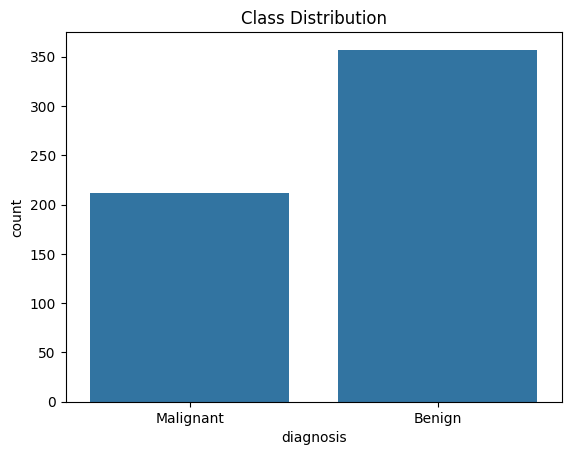

In [ ]:
print("Class Distribution:")
print(df['diagnosis'].value_counts())
sns.countplot(x=df['diagnosis'])
plt.xticks(ticks=[0,1], labels=['Malignant', 'Benign'])
plt.title("Class Distribution")
plt.show()

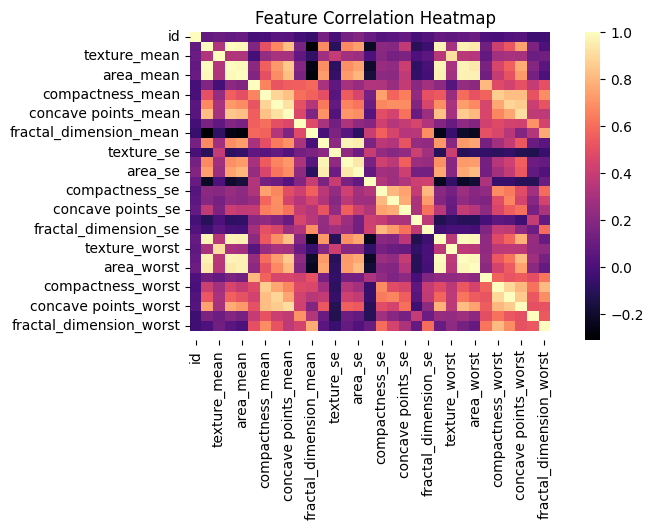

In [ ]:

plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), cmap="magma", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
df.drop(['id','Unnamed: 32'], axis=1, inplace=True)

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])


In [ ]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "k-NN": KNeighborsClassifier(),

}


In [ ]:
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)

print("Model Accuracies: ",accuracies)


Model Accuracies:  {'Logistic Regression': 0.9736842105263158, 'Decision Tree': 0.9385964912280702, 'Random Forest': 0.9649122807017544, 'SVM': 0.9736842105263158, 'k-NN': 0.9473684210526315}


In [ ]:
precisions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precisions[name] = precision_score(y_test, y_pred)

print("Model Precisions:", precisions)


Model Precisions: {'Logistic Regression': 0.9761904761904762, 'Decision Tree': 0.9090909090909091, 'Random Forest': 0.975609756097561, 'SVM': 0.9761904761904762, 'k-NN': 0.9302325581395349}


In [ ]:
recalls = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    recalls[name] = recall_score(y_test, y_pred)

print("Model Recalls:", recalls)


Model Recalls: {'Logistic Regression': 0.9534883720930233, 'Decision Tree': 0.9069767441860465, 'Random Forest': 0.9302325581395349, 'SVM': 0.9534883720930233, 'k-NN': 0.9302325581395349}


In [ ]:
f1_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_scores[name] = f1_score(y_test, y_pred)

print("Model F1-Scores:", f1_scores)


Model F1-Scores: {'Logistic Regression': 0.9647058823529412, 'Decision Tree': 0.9176470588235294, 'Random Forest': 0.9523809523809523, 'SVM': 0.9647058823529412, 'k-NN': 0.9302325581395349}


In [ ]:

roc_auc_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    roc_auc_scores[name] = roc_auc_score(y_test, y_pred_prob)

print("Model ROC-AUC Scores:", roc_auc_scores)


Model ROC-AUC Scores: {'Logistic Regression': 0.99737962659679, 'Decision Tree': 0.9299050114641335, 'Random Forest': 0.9950867998689813, 'SVM': 0.99737962659679, 'k-NN': 0.9816573861775302}


In [ ]:
best_model = max(accuracies, key=accuracies.get)
print(f"Best Model: {best_model} with accuracy {accuracies[best_model]:.3f}")

Best Model: Logistic Regression with accuracy 0.974


In [ ]:
best_precision_model = max(precisions, key=precisions.get)
print(f"Best Model : {best_precision_model} with Precision {precisions[best_precision_model]:.3f}")

Best Model : Logistic Regression with Precision 0.976


In [ ]:
best_recall_model = max(recalls, key=recalls.get)
print(f"Best Model : {best_recall_model} with recall {recalls[best_recall_model]:.3f}")

Best Model : Logistic Regression with recall 0.953


In [ ]:
best_f1_model = max(f1_scores, key=f1_scores.get)
print(f"Best Model : {best_f1_model} with f1_score {f1_scores[best_f1_model]:.3f}")

Best Model : Logistic Regression with f1_score 0.965


In [ ]:
best_roc_auc_model = max(roc_auc_scores, key=roc_auc_scores.get)
print(f"Best Model : {best_roc_auc_model} with roc_auc_score {roc_auc_scores[best_roc_auc_model]:.3f}")

Best Model : Logistic Regression with roc_auc_score 0.997
